# AI - Project 02- Mohsen Fayyaz - 810196650

<ul>
    <li><b>Algorithms:</b><br>
        <ul>
            <li>
                <b>Minimax</b> is a decision rule used in artificial intelligence, decision theory, game theory, statistics and philosophy for minimizing the possible loss for a worst-case scenario. When dealing with gains, it is referred to as "maximin"—to maximize the minimum gain.
            </li>
            <li>
                The game we are modeling is a zero-sum game. Because the maximum points, in the end, is 1 and the player that can't move will get 0 and the winner gets one.<br>
                So each player is trying to maximize its points and minimize it's opponent's
            </li>
            <li>
                In the context of zero-sum games, the minimax theorem is equivalent to:
                <br>
    For every two-person, zero-sum game with finitely many strategies, there exists a value V and a mixed strategy for each player, such that<br>
        (a) Given player 2's strategy, the best payoff possible for player 1 is V, and <br>
        (b) Given player 1's strategy, the best payoff possible for player 2 is −V. <br>
Equivalently, Player 1's strategy guarantees them a payoff of V regardless of Player 2's strategy, and similarly, Player 2 can guarantee themselves a payoff of −V. The name minimax arises because each player minimizes the maximum payoff possible for the other—since the game is zero-sum, they also minimize their maximum loss (i.e. maximize their minimum payoff)
            </li>
            <li>
                <b>Alpha–beta pruning</b> is a search algorithm that seeks to decrease the number of nodes that are evaluated by the minimax algorithm in its search tree. It is an adversarial search algorithm used commonly for machine playing of two-player games.
            </li>
        </ul>
    </li>
</ul>

<img src="https://image.slidesharecdn.com/gameplayinginatrifiialintelligence-090406023741-phpapp02/95/game-playing-in-artificial-intelligence-19-728.jpg?cb=1238985506" />

## MiniMax Pseudo code:

## AlphaBeta Pseudo code:

## Game.py

In [91]:
import random
import copy


class GameError(AttributeError):
    pass


class Game:

    def __init__(self, n):
        self.size = n
        self.half_the_size = int(n / 2)
        self.reset()

    def reset(self):
        self.board = []
        value = 'B'
        for i in range(self.size):
            row = []
            for j in range(self.size):
                row.append(value)
                value = self.opponent(value)
            self.board.append(row)
            if self.size % 2 == 0:
                value = self.opponent(value)

    def __str__(self):
        result = "  "
        for i in range(self.size):
            result += str(i) + " "
        result += "\n"
        for i in range(self.size):
            result += str(i) + " "
            for j in range(self.size):
                result += str(self.board[i][j]) + " "
            result += "\n"
        return result

    def valid(self, row, col):
        return 0 <= row < self.size and 0 <= col < self.size

    def contains(self, board, row, col, symbol):
        return self.valid(row, col) and board[row][col] == symbol

    def countSymbol(self, board, symbol):
        count = 0
        for r in range(self.size):
            for c in range(self.size):
                if board[r][c] == symbol:
                    count += 1
        return count

    def opponent(self, player):
        if player == 'B':
            return 'W'
        else:
            return 'B'

    def distance(self, r1, c1, r2, c2):
        return abs(r1 - r2 + c1 - c2)

    def makeMove(self, player, move):
        self.board = self.nextBoard(self.board, player, move)

    def nextBoard(self, board, player, move):
        r1 = move[0]
        c1 = move[1]
        r2 = move[2]
        c2 = move[3]
        next = copy.deepcopy(board)
        if not (self.valid(r1, c1) and self.valid(r2, c2)):
            raise GameError
        if next[r1][c1] != player:
            raise GameError
        dist = self.distance(r1, c1, r2, c2)
        if dist == 0:
            if self.openingMove(board):
                next[r1][c1] = "."
                return next
            raise GameError
        if next[r2][c2] != ".":
            raise GameError
        jumps = int(dist / 2)
        dr = int((r2 - r1) / dist)
        dc = int((c2 - c1) / dist)
        for i in range(jumps):
            if next[r1 + dr][c1 + dc] != self.opponent(player):
                raise GameError
            next[r1][c1] = "."
            next[r1 + dr][c1 + dc] = "."
            r1 += 2 * dr
            c1 += 2 * dc
            next[r1][c1] = player
        return next

    def openingMove(self, board):
        return self.countSymbol(board, ".") <= 1

    def generateFirstMoves(self, board):
        moves = []
        moves.append([0] * 4)
        moves.append([self.size - 1] * 4)
        moves.append([self.half_the_size] * 4)
        moves.append([self.half_the_size - 1] * 4)
        return moves

    def generateSecondMoves(self, board):
        moves = []
        if board[0][0] == ".":
            moves.append([0, 1] * 2)
            moves.append([1, 0] * 2)
            return moves
        elif board[self.size - 1][self.size - 1] == ".":
            moves.append([self.size - 1, self.size - 2] * 2)
            moves.append([self.size - 2, self.size - 1] * 2)
            return moves
        elif board[self.half_the_size - 1][self.half_the_size - 1] == ".":
            pos = self.half_the_size - 1
        else:
            pos = self.half_the_size
        moves.append([pos, pos - 1] * 2)
        moves.append([pos + 1, pos] * 2)
        moves.append([pos, pos + 1] * 2)
        moves.append([pos - 1, pos] * 2)
        return moves

    def check(self, board, r, c, rd, cd, factor, opponent):
        if self.contains(board, r + factor * rd, c + factor * cd, opponent) and \
                self.contains(board, r + (factor + 1) * rd, c + (factor + 1) * cd, '.'):
            return [[r, c, r + (factor + 1) * rd, c + (factor + 1) * cd]] + \
                   self.check(board, r, c, rd, cd, factor + 2, opponent)
        else:
            return []

    def generateMoves(self, board, player):
        if self.openingMove(board):
            if player == 'B':
                return self.generateFirstMoves(board)
            else:
                return self.generateSecondMoves(board)
        else:
            moves = []
            rd = [-1, 0, 1, 0]
            cd = [0, 1, 0, -1]
            for r in range(self.size):
                for c in range(self.size):
                    if board[r][c] == player:
                        for i in range(len(rd)):
                            moves += self.check(board, r, c, rd[i], cd[i], 1,
                                                self.opponent(player))
            return moves

    def playOneGame(self, p1, p2, show):
        self.reset()
        while True:
            if show:
                print(self)
                print("player B's turn")
            move = p1.getMove(self.board)
            if move == []:
                print("Game over")
                return 'W'
            try:
                self.makeMove('B', move)
            except GameError:
                print("Game over: Invalid move by", p1.name)
                print(move)
                print(self)
                return 'W'
            if show:
                print(move)
                print(self)
                print("player W's turn")
            move = p2.getMove(self.board)
            if move == []:
                print("Game over")
                return 'B'
            try:
                self.makeMove('W', move)
            except GameError:
                print("Game over: Invalid move by", p2.name)
                print(move)
                print(self)
                return 'B'
            if show:
                print(move)

    def playNGames(self, n, p1, p2, show):
        first = p1
        second = p2
        for i in range(n):
            print("Game", i)
            winner = self.playOneGame(first, second, show)
            if winner == 'B':
                first.won()
                second.lost()
                print(first.name, "wins")
            else:
                first.lost()
                second.won()
                print(second.name, "wins")
            first, second = second, first


class Player:
    name = "Player"
    wins = 0
    losses = 0

    def results(self):
        result = self.name
        result += " Wins:" + str(self.wins)
        result += " Losses:" + str(self.losses)
        return result

    def lost(self):
        self.losses += 1

    def won(self):
        self.wins += 1

    def reset(self):
        self.wins = 0
        self.losses = 0

    def initialize(self, side):
        abstract()

    def getMove(self, board):
        abstract()


class SimplePlayer(Game, Player):
    def initialize(self, side):
        self.side = side
        self.name = "Simple"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            return moves[0]


class RandomPlayer(Game, Player):
    def initialize(self, side):
        self.side = side
        self.name = "Random"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            return moves[random.randrange(0, n)]


class HumanPlayer(Game, Player):
    def initialize(self, side):
        self.side = side
        self.name = "Human"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        while True:
            print("Possible moves:", moves)
            n = len(moves)
            if n == 0:
                print("You must concede")
                return []
            index = input("Enter index of chosen move (0-" + str(n - 1) +
                          ") or -1 to concede: ")
            try:
                index = int(index)
                if index == -1:
                    return []
                if 0 <= index <= (n - 1):
                    print("returning", moves[index])
                    return moves[index]
                else:
                    print("Invalid choice, try again.")
            except Exception as e:
                print("Invalid choice, try again.")


# if __name__ == '__main__':
#     game = Game(8)
#     human1 = HumanPlayer(8)
#     human1.initialize('B')
#     human2 = HumanPlayer(8)
#     human2.initialize('W')
#     game.playOneGame(human1, human2, True)

# Minimax Player without pruning

As shown below, at first I initiate the player and its parents and set the max depth to observe, in the constructor.
Then the minimax function, based on the current side which is being passed to it, iterates on the possible moves, and decides to return the minimum or maximum of the iterated moves.<br>
The termination condition of the recursion is when the current depth reaches the maximum depth determined in the constructor. At this point, I return the evaluation function of that board.

## Minimax Player without pruning implementation:

In [96]:
import random
import time
from copy import deepcopy
from os import system, name
from IPython.core.display import clear_output
import numpy as np

class MinimaxPlayer(Game, Player):
    def __init__(self, n, maxDepth=3):
        super().__init__(n)
        self.maxDepth = maxDepth-1  # 0 based

    def initialize(self, side):
        self.side = side
        self.name = "MINIMAX"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            start = time.time()
            bestMove = self.minimax(board, self.side)
            end = time.time()
            cls()
            print("Turn Time: " + str(end - start))
            return bestMove

    def evaluateFunction(self, board):
        return len(self.generateMoves(board, self.side)) - len(self.generateMoves(board, self.opponent(self.side)))

    def minimax(self, board, currentSide, depth=0):
        moves = self.generateMoves(board, currentSide)
        if depth > self.maxDepth or len(moves) == 0:
            return self.evaluateFunction(board)

        if currentSide == self.side:  # MAXIMIZE
            maxAlpha = -np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1)
                if moveValue > maxAlpha:
                    maxAlpha = moveValue
                    bestMove = move

            if depth == 0:
                return bestMove
            else:
                return maxAlpha

        else:  # MINIMIZE
            minBeta = np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1)
                if moveValue < minBeta:
                    minBeta = moveValue

            return minBeta


def cls():
    # for windows
    if name == 'nt':
        _ = system('cls')

        # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')
    clear_output(wait=True)



# Minimax Player with pruning

This Algorithm is the same as above, except that I pass the best value we can get in a branch for maximizing as alpha, and for minimizing as beta.<br>
alpha and beta will be initiated as optional arguments as follows:<br>
$$
    \left\{\begin{array}{lr}
    Alpha = -\infty \\
    Beta  = +\infty \\
    \end{array}\right\}
$$<br>
So if we are in a maximizing state and we see a state in the iteration on possible moves, which gives us a score more than the **beta**, it means the minimizing ancestors of this maximizing state will never use this state's value because they had a less scoring child before. <br>
This is how pruning works for maximizing states and vice versa. <br>

## Minimax Player with pruning implementation:

In [97]:
import random
import time
from copy import deepcopy
from os import system, name
from IPython.core.display import clear_output
import numpy as np

class MinimaxPrunedPlayer(Game, Player):
    def __init__(self, n, maxDepth=4):
        super().__init__(n)
        self.maxDepth = maxDepth-1  # 0 based

    def initialize(self, side):
        self.side = side
        self.name = "MINIMAX"

    def getMove(self, board):
        moves = self.generateMoves(board, self.side)
        n = len(moves)
        if n == 0:
            return []
        else:
            start = time.time()
            bestMove = self.minimax(board, self.side)
            end = time.time()
            cls()
            print("Turn Time: " + str(end - start))
            return bestMove

    def evaluateFunction(self, board):
        return len(self.generateMoves(board, self.side)) - len(self.generateMoves(board, self.opponent(self.side)))

    def minimax(self, board, currentSide, depth=0, alpha=-np.inf, beta=np.inf):
        moves = self.generateMoves(board, currentSide)
        if depth > self.maxDepth or len(moves) == 0:
            return self.evaluateFunction(board)

        if currentSide == self.side:  # MAXIMIZE
            maxAlpha = -np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1, alpha, beta)
                if moveValue > beta:
                    return moveValue
                if moveValue > maxAlpha:
                    maxAlpha = moveValue
                    bestMove = move
                    alpha = max(alpha, maxAlpha)
            # print("Max ", depth, moveValue, maxAlpha)
            if depth == 0:
                return bestMove
            else:
                return maxAlpha

        else:  # MINIMIZE
            minBeta = np.inf
            for move in moves:
                newBoard = self.nextBoard(board, currentSide, move)
                moveValue = self.minimax(newBoard, self.opponent(currentSide), depth + 1, alpha, beta)
                if moveValue < alpha:
                    return moveValue
                if moveValue < minBeta:
                    minBeta = moveValue
                    beta = min(beta, minBeta)
            # print("Min ", depth, moveValue, minBeta)
            return minBeta


def cls():
    # for windows
    if name == 'nt':
        _ = system('cls')
        # for mac and linux(here, os.name is 'posix')
    else:
        _ = system('clear')
    clear_output(wait=True)


In [98]:
import time

if __name__ == '__main__':
    game = Game(8)
    # human1 = HumanPlayer(8)
    # human1.initialize('B')
    # human2 = HumanPlayer(8)
    # human2.initialize('W')

    p2 = RandomPlayer(8)
    p2.initialize('W')

#     p2 = SimplePlayer(8)
#     p2.initialize('W')

#     p2 = MinimaxPlayer(8, 3)
#     p2.initialize('W')


#     p1 = MinimaxPlayer(8, 4)
#     p1.initialize('B')
    p1 = MinimaxPrunedPlayer(8, 4)
    p1.initialize('B')

    start = time.time()
    game.playOneGame(p1, p2, True)
    end = time.time()

    print("Overal Time: ", end - start)

Turn Time: 0.031243562698364258
[7, 3, 7, 5]
  0 1 2 3 4 5 6 7 
0 B . B . B . . . 
1 . . . . W B W . 
2 B . B . . . . W 
3 . . . . W . . . 
4 B W B W . . . W 
5 . . . . . . . . 
6 . . . . . W B W 
7 W B W . . B . B 

player W's turn
Game over
Overal Time:  6.732745409011841


# 1) Evaluation Function


I chose the number of possible moves for our player minus number of possible moves for the opponent.<br>
<br>$$EvaluationFunction = possibleMoves_{self} - possibleMoves_{opponent}$$<br>
It is rational because the more possible moves a player has, the better chance he has to win the whole game.<br>
Therefore, our player's number of possible moves is in our favor, while opponent's #moves is against us. 
    



# 2) Are moves of Alpha-Beta and minimax different?

### NO
AlphaBeta search is just an optimization on minimax so that we don't explore unnecessary subtrees.<br>


<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/9/91/AB_pruning.svg/400px-AB_pruning.svg.png" />
An illustration of alpha–beta pruning. The grayed-out subtrees don't need to be explored (when moves are evaluated from left to right), since we know the group of subtrees as a whole yields the value of an equivalent subtree or worse, and as such cannot influence the final result. The max and min levels represent the turn of the player and the adversary, respectively.

And as an example, here is the last state of the board in calling Minimax and AlphaBeta against the simple player which
shows that there is no difference between the results of these two.
<table style="width:100%; border: 1px solid #ddd;">
    <tr></tr>
    <tr>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">Max-Depth 3</th>
                    </tr>
                    <tr>
                        <th style="text-align: center;">Alpha-Beta</th>
                        <th style="text-align: center;">MiniMax</th>
                    </tr>
                </thead>
                <tr>
                    <td style="text-align: center; font-family:'Lucida Console', monospace"><b>
                            # 0 1 2 3 4 5 6 7 <br>
                            0 . . . . . . B . <br>
                            1 . . . . W . . B <br>
                            2 . . B . . . B . <br>
                            3 . . . . . . . B <br>
                            4 B . . . . . B . <br>
                            5 . . W B W . . . <br>
                            6 . . . . . W . W <br>
                            7 W B W . W . W B </b>
                    </td>
                    <td style="text-align: center; font-family:'Lucida Console', monospace"><b>
                            # 0 1 2 3 4 5 6 7 <br>
                            0 . . . . . . B . <br>
                            1 . . . . W . . B <br>
                            2 . . B . . . B . <br>
                            3 . . . . . . . B <br>
                            4 B . . . . . B . <br>
                            5 . . W B W . . . <br>
                            6 . . . . . W . W <br>
                            7 W B W . W . W B </b>
                    </td>
                </tr>
            </table>
        </td>
        <td>
            <table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">Max-Depth 4</th>
                    </tr>
                    <tr>
                        <th style="text-align: center;">Alpha-Beta</th>
                        <th style="text-align: center;">MiniMax</th>
                    </tr>
                </thead>
                <tr>
                    <td style="text-align: center; font-family:'Lucida Console', monospace"><b>
                            # 0 1 2 3 4 5 6 7 <br>
                            0 B . . . . . . W <br>
                            1 . . . . . . . . <br>
                            2 B . . W . . . W <br>
                            3 . . . . W . . . <br>
                            4 . . . . . . . . <br>
                            5 . . . B . B . . <br>
                            6 . . . . . . B . <br>
                            7 W B W . . B . . </b>
                    </td>
                    <td style="text-align: center; font-family:'Lucida Console', monospace"><b>
                            # 0 1 2 3 4 5 6 7 <br>
                            0 B . . . . . . W <br>
                            1 . . . . . . . . <br>
                            2 B . . W . . . W <br>
                            3 . . . . W . . . <br>
                            4 . . . . . . . . <br>
                            5 . . . B . B . . <br>
                            6 . . . . . . B . <br>
                            7 W B W . . B . . </b>
                    </td>
                </tr>
            </table>
        </td>
    </tr>
</table>

# 3) AlphaBeta and Minimax Time Results
As shown below, Alpha-Beta Pruning makes the algorithm way faster by excluding unnecessary subtrees.

<table style="width:100%; border: 1px solid #ddd;">
                <thead>
                    <tr>
                        <th style="text-align: center;">Simple Player Opponent</th>
                    </tr>
                    <tr>
                        <th style="text-align: center;">Algorithm</th>
                        <th style="text-align: center;">Max Tree Depth</th>
                        <th style="text-align: center;">Execution Time</th>
                    </tr>
                </thead>
                <tr>
                    <td style="text-align: center;"><b>AlphaBeta</b></td>         
                    <td style="text-align: center;">3</td>
                    <td style="text-align: center;">2.26s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>MiniMax</b></td>         
                    <td style="text-align: center;">3</td>
                    <td style="text-align: center;">3.77s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>AlphaBeta</b></td>         
                    <td style="text-align: center;">4</td>
                    <td style="text-align: center;">5.31s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>MiniMax</b></td>         
                    <td style="text-align: center;">4</td>
                    <td style="text-align: center;">21.06s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>AlphaBeta</b></td>         
                    <td style="text-align: center;">5</td>
                    <td style="text-align: center;">18.45s</td>
                </tr>
                <tr>
                    <td style="text-align: center;"><b>MiniMax</b></td>         
                    <td style="text-align: center;">5</td>
                    <td style="text-align: center;">173.96s</td>
                </tr>
            </table>

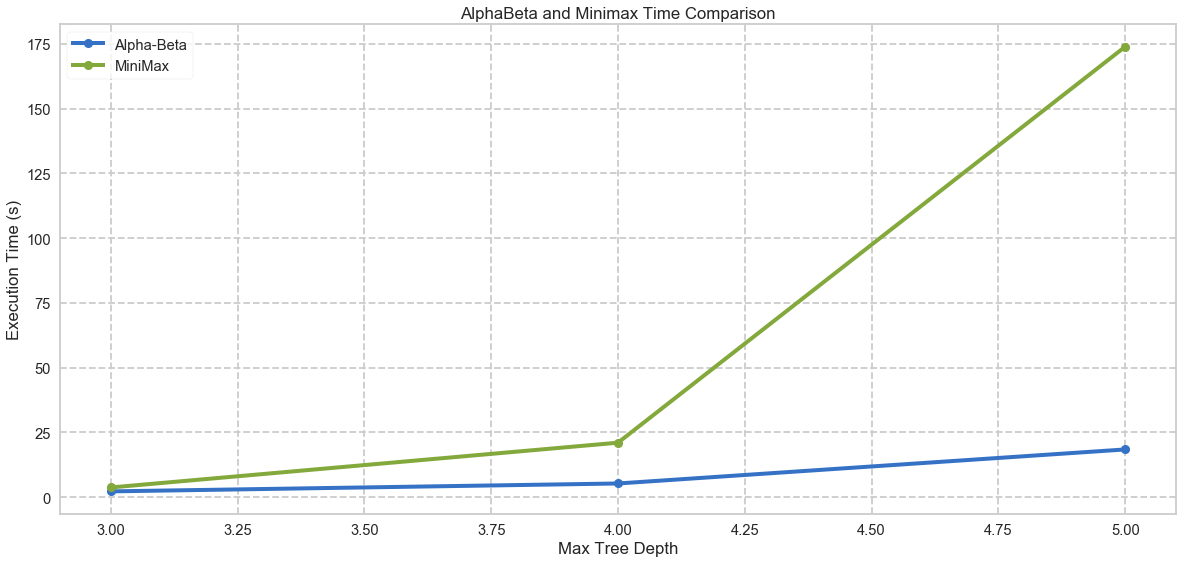

In [99]:
import matplotlib.pyplot as plt

alphaBeta = [2.26, 5.31, 18.45]
minimax = [3.77, 21.06, 173.96]
maxDepth = [3, 4, 5]
line_width = 4

plt.figure(figsize=(20, 9))
plt.plot(maxDepth, alphaBeta, '-o', label="Alpha-Beta", linewidth=line_width)
plt.plot(maxDepth, minimax, '-o', label="MiniMax", linewidth=line_width)
plt.title("AlphaBeta and Minimax Time Comparison")
plt.xlabel("Max Tree Depth")
plt.ylabel("Execution Time (s)")
plt.legend(loc="upper left")
plt.show()